## Objetivo del Proyecto: Clasificación de la Severidad de Accidentes

Este proyecto busca resolver un problema de **clasificación supervisada**:  
**predecir la severidad (lesividad) de un accidente de tráfico en Madrid**,  
utilizando variables como:

- Condiciones climáticas (`condiciones_meteorologicas`)
- Hora del accidente (`hora`)

Se emplearán técnicas de ciencia de datos como análisis exploratorio, ingeniería de atributos, entrenamiento de modelos, optimización de hiperparámetros, validación cruzada y ensamble de modelos.

**Accidentes de tráfico de la ciudad de Madrid ENERO 2025**

En este análisis se explorarán los datos sobre los accidentes de tráfico ocurridos en la ciudad de Madrid. Se utilizará un conjunto de datos proporcionado por el Portal de Datos Abiertos del Ayuntamiento de Madrid, el cual contiene información detallada sobre cada siniestro, incluyendo variables como la fecha, ubicación, número de víctimas, condiciones climáticas y tipo de vehículo involucrado.

El objetivo de este estudio es comprender mejor la distribución y las características de los accidentes en la ciudad a través de técnicas de exploración y análisis de datos.

FUENTE: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default&vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&utm_source=chatgpt.com

# PREGUNTAS

¿Cuántos accidentes han ocurrido en el período de tiempo analizado?

¿Cómo están distribuidos los accidentes por distrito? ¿Hay zonas con más accidentes que otras?

¿Cuáles son las condiciones meteorológicas más comunes en los accidentes?

¿Qué tipos de vehículos están más involucrados en los accidentes?

¿A qué horas del día suelen ocurrir más accidentes? ¿Se observan picos en horas pico o nocturnas?

¿Los accidentes aumentan los fines de semana en comparación con los días hábiles?

¿Qué distritos tienen la mayor cantidad de accidentes con víctimas?

¿Existe una relación entre el tipo de accidente y la gravedad del mismo?

¿Los accidentes con resultado de muerte o lesiones graves se concentran en ciertas condiciones específicas (clima, hora, tipo de vehículo)?

¿Hay una relación entre el consumo de alcohol/drogas y la severidad de los accidentes?

¿Qué factores tienen más impacto en la cantidad de víctimas en un accidente?
¿Es posible predecir la gravedad de un accidente según las condiciones del momento?

¿Cómo afecta la presencia de lluvia o niebla en la cantidad de accidentes?

# METADATA

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
df = pd.read_excel("/content/DATASET 2025_Accidentalidad.xlsx")

In [165]:
# Mostrar información general sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        4075 non-null   object        
 1   fecha                 4075 non-null   datetime64[ns]
 2   hora                  4075 non-null   object        
 3   localizacion          4075 non-null   object        
 4   numero                4075 non-null   object        
 5   cod_distrito          4075 non-null   int64         
 6   distrito              4075 non-null   object        
 7   tipo_accidente        4075 non-null   object        
 8   estado_meteorológico  4075 non-null   object        
 9   tipo_vehiculo         4057 non-null   object        
 10  tipo_persona          4075 non-null   object        
 11  rango_edad            4075 non-null   object        
 12  sexo                  4075 non-null   object        
 13  lesividad         

In [104]:
# Mostrar el tamaño (filas y columnas)
df.shape

(4075, 18)

In [105]:
# Mostrar las primeras filas
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Conductor,De 30 a 34 años,Hombre,Sin asistencia sanitaria,445269.641,4475978.517,NO,SI
1,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Pasajero,De 21 a 24 años,Mujer,Sin asistencia sanitaria,445269.641,4475978.517,NO,NO
2,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Peatón,De 55 a 59 años,Hombre,Ingreso superior a 24 horas,445269.641,4475978.517,NO,NO
3,2025S000056,2025-01-01,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,De 30 a 34 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,442965.751,4477385.334,NO,NO
4,2025S000056,2025-01-01,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,Sin asistencia sanitaria,442965.751,4477385.334,NO,NO


# DATA WRANGLING

In [358]:
# Revisar valores nulos y duplicados
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
num_expediente           0
fecha                    0
hora                     0
localizacion             0
numero                   0
cod_distrito             0
distrito                 0
tipo_accidente           0
estado_meteorológico     0
tipo_vehiculo           18
tipo_persona             0
rango_edad               0
sexo                     0
lesividad                0
coordenada_x_utm         8
coordenada_y_utm         8
positiva_alcohol         0
positiva_droga           0
dtype: int64


In [359]:
print("\nValores duplicados en el dataset:", df.duplicated().sum())


Valores duplicados en el dataset: 178


In [360]:
# Eliminar duplicados
df = df.drop_duplicates()

In [361]:
# Convertir "fecha" a datetime si no está en el formato correcto
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

<ipython-input-361-de048685c149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")


In [362]:
# Verificar si hay columnas categóricas que deban ser de tipo string
columnas_categoricas = ["estado_meteorológico", "tipo_vehiculo", "distrito", "lesividad", "positiva_alcohol"]
for col in columnas_categoricas:
    df[col] = df[col].astype(str)

<ipython-input-362-7fa19ccaaf1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
<ipython-input-362-7fa19ccaaf1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
<ipython-input-362-7fa19ccaaf1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 0 to 4074
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        3897 non-null   object        
 1   fecha                 3897 non-null   datetime64[ns]
 2   hora                  3897 non-null   object        
 3   localizacion          3897 non-null   object        
 4   numero                3897 non-null   object        
 5   cod_distrito          3897 non-null   int64         
 6   distrito              3897 non-null   object        
 7   tipo_accidente        3897 non-null   object        
 8   estado_meteorológico  3897 non-null   object        
 9   tipo_vehiculo         3897 non-null   object        
 10  tipo_persona          3897 non-null   object        
 11  rango_edad            3897 non-null   object        
 12  sexo                  3897 non-null   object        
 13  lesividad             3

In [364]:
# Convertir la columna "hora" asegurando que tiene formato adecuado
def convertir_hora(valor):
    try:
        return pd.to_datetime(valor, format='%H:%M:%S').hour
    except:
        try:
            return int(valor)
        except:
            return None

In [365]:
df["hora"] = pd.to_datetime(df["hora"], format='%H:%M:%S', errors='coerce').dt.hour

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 0 to 4074
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        3897 non-null   object        
 1   fecha                 3897 non-null   datetime64[ns]
 2   hora                  3897 non-null   int32         
 3   localizacion          3897 non-null   object        
 4   numero                3897 non-null   object        
 5   cod_distrito          3897 non-null   int64         
 6   distrito              3897 non-null   object        
 7   tipo_accidente        3897 non-null   object        
 8   estado_meteorológico  3897 non-null   object        
 9   tipo_vehiculo         3897 non-null   object        
 10  tipo_persona          3897 non-null   object        
 11  rango_edad            3897 non-null   object        
 12  sexo                  3897 non-null   object        
 13  lesividad             3

In [367]:
# Rellenar valores nulos en tipo_vehiculo con 'Desconocido'
df["tipo_vehiculo"].fillna("Desconocido", inplace=True)

<ipython-input-367-e99a5e5d84b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tipo_vehiculo"].fillna("Desconocido", inplace=True)


In [368]:
# Rellenar valores nulos en lesividad con 'Desconocido'
df["lesividad"].fillna("Desconocido", inplace=True)

<ipython-input-368-ab5a75f2d415>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lesividad"].fillna("Desconocido", inplace=True)


In [369]:
# Rellenar valores nulos en coordenada_x_utm con 'no informa'
df["coordenada_x_utm"].fillna("no informa", inplace=True)

<ipython-input-369-975f971c9aa8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coordenada_x_utm"].fillna("no informa", inplace=True)
<ipython-input-369-975f971c9aa8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no informa' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["coordenada_x_utm"].fillna("no informa", inplace=True)


In [370]:
# Rellenar valores nulos en coordenada_y_utm con 'no informa'
df["coordenada_y_utm"].fillna("no informa", inplace=True)

<ipython-input-370-7a2007fe8e24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coordenada_y_utm"].fillna("no informa", inplace=True)
<ipython-input-370-7a2007fe8e24>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no informa' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["coordenada_y_utm"].fillna("no informa", inplace=True)


In [371]:
# Revisar nuevamente los valores nulos
print("\nValores nulos tras limpieza:")
print(df.isnull().sum())



Valores nulos tras limpieza:
num_expediente          0
fecha                   0
hora                    0
localizacion            0
numero                  0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
lesividad               0
coordenada_x_utm        0
coordenada_y_utm        0
positiva_alcohol        0
positiva_droga          0
dtype: int64


# EDA y ANALISIS ESTADISTICO DE DATOS

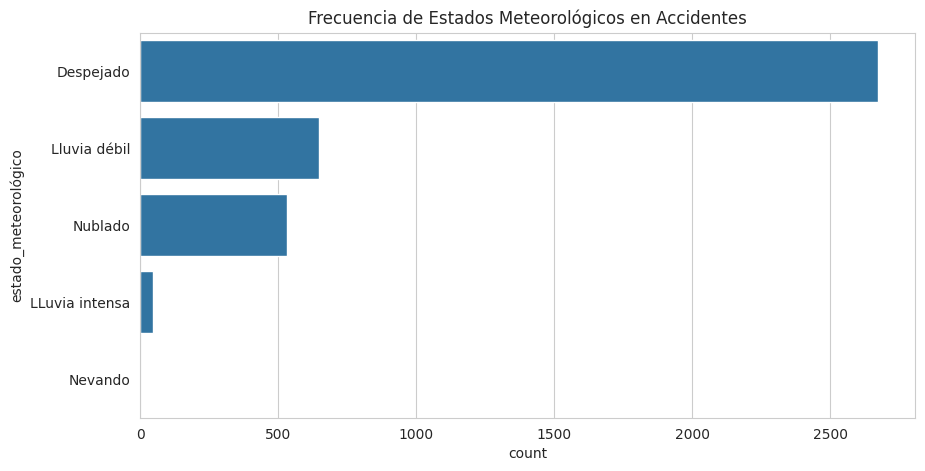

In [180]:
# Frecuencia de estados meteorològicos en accidentes (UNIVARIADO)
plt.figure(figsize=(10,5))
sns.countplot(y=df["estado_meteorológico"], order=df["estado_meteorológico"].value_counts().index)
plt.title("Frecuencia de Estados Meteorológicos en Accidentes")
plt.show()


El gráfico muestra que ciertos estados meteorológicos, como cielos despejados o nubosos, son los más frecuentes en accidentes, mientras que condiciones extremas, como nieve o niebla densa, son menos comunes.

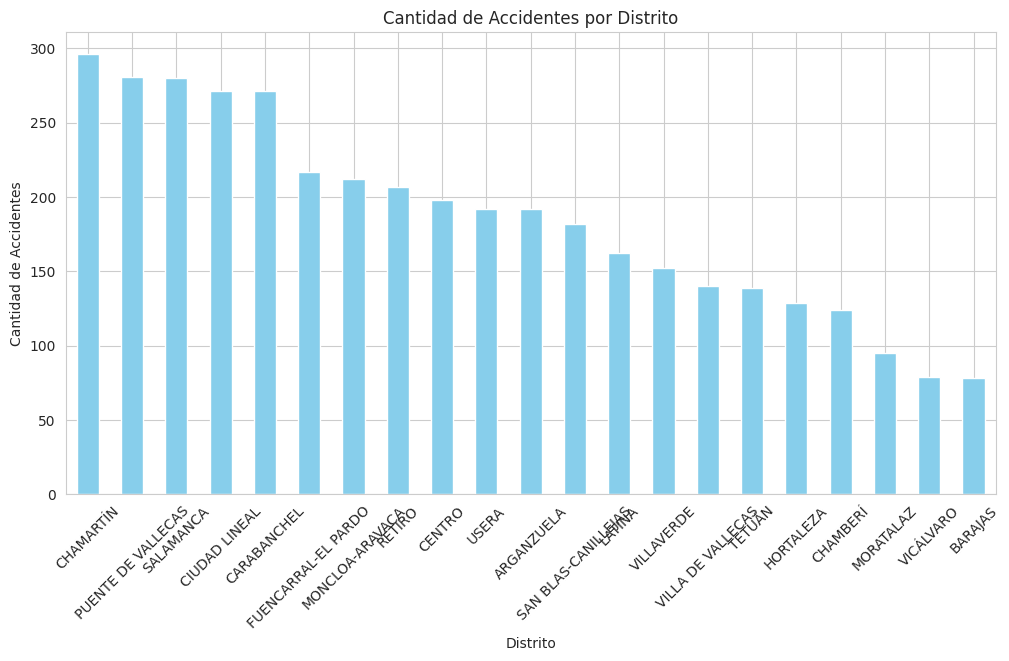

In [121]:
# Distribución de accidentes por distrito (UNIVARIADO)
plt.figure(figsize=(12,6))
df["distrito"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Cantidad de Accidentes por Distrito")
plt.xlabel("Distrito")
plt.ylabel("Cantidad de Accidentes")
plt.xticks(rotation=45)
plt.show()

El gráfico refleja una mayor concentración de accidentes en algunos distritos específicos, lo que podría estar relacionado con factores como el tráfico intenso o la infraestructura vial.

<ipython-input-122-355e9f80d7a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


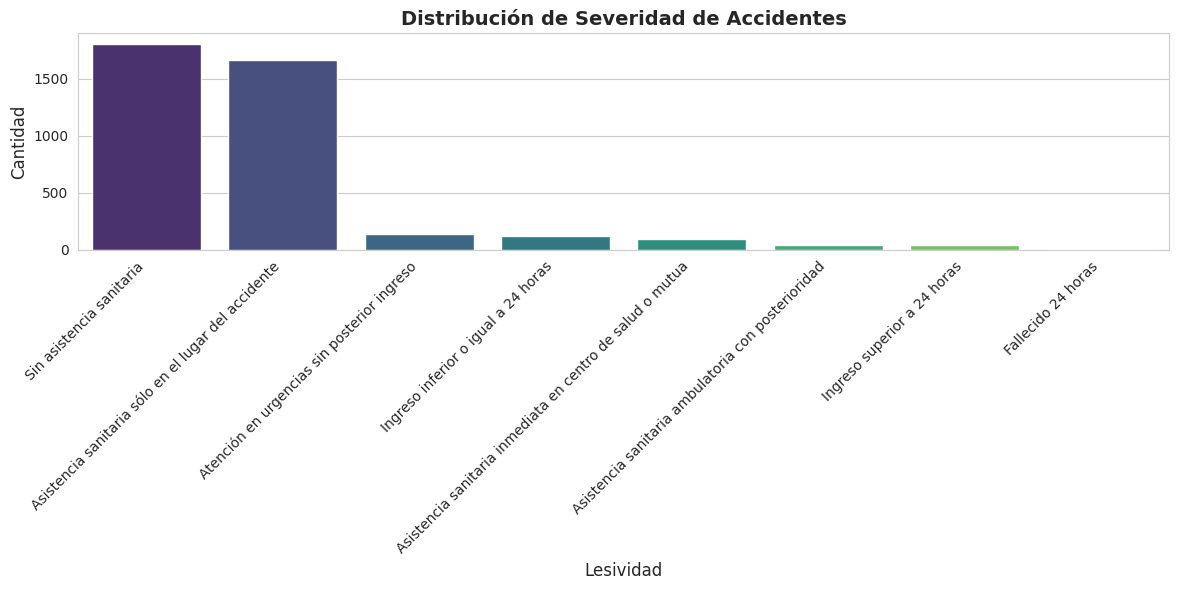

In [122]:
# Análisis de la severidad de los accidentes (UNIVARIADO)

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x="lesividad",
              order=df["lesividad"].value_counts().index,
              palette="viridis")


plt.title("Distribución de Severidad de Accidentes", fontsize=14, fontweight='bold')
plt.xlabel("Lesividad", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)


plt.xticks(rotation=45, ha='right', fontsize=10)


plt.tight_layout()
plt.show()

La mayoría de los accidentes presentan una lesividad leve, mientras que los accidentes graves o mortales son menos frecuentes. Esto sugiere que, aunque los accidentes son comunes, la mayoría no resultan en consecuencias graves. Además, odemos ver cómo se distribuyen los distintos niveles de lesividad para ir teniendo en cuenta nuestra proyección de los datos en cuanto al balance.

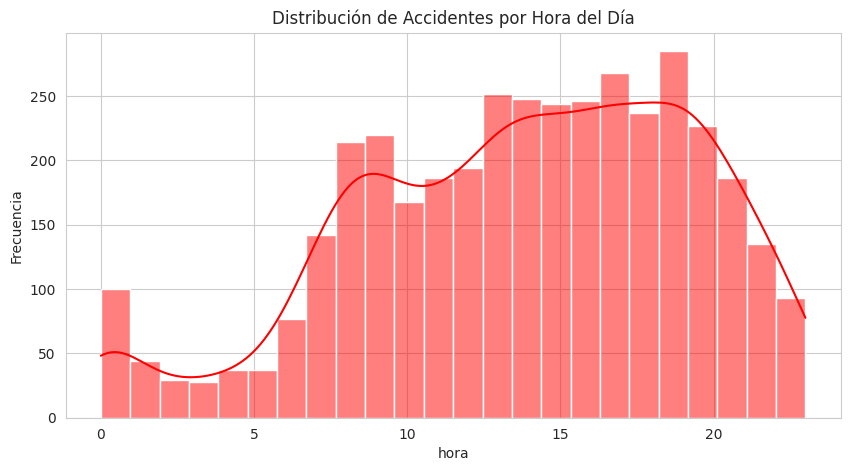

In [181]:
# Análisis temporal de accidentes (UNIVARIADO)
df["fecha"] = pd.to_datetime(df["fecha"])

plt.figure(figsize=(10,5))
sns.histplot(df["hora"].dropna(), bins=24, kde=True, color='red')
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("hora")
plt.ylabel("Frecuencia")
plt.show()


In [124]:
print(df["hora"].value_counts(dropna=False).head(10))


hora
19    285
17    268
13    252
14    248
16    246
15    244
18    237
20    227
9     220
8     214
Name: count, dtype: int64


Los accidentes se distribuyen a lo largo de todo el día, con un ligero aumento en las horas pico de tráfico, lo que sugiere que la congestión vehicular puede influir en la frecuencia de los siniestros.

<ipython-input-125-61ba7e6cb46a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['es_fin_de_semana'], palette='coolwarm')


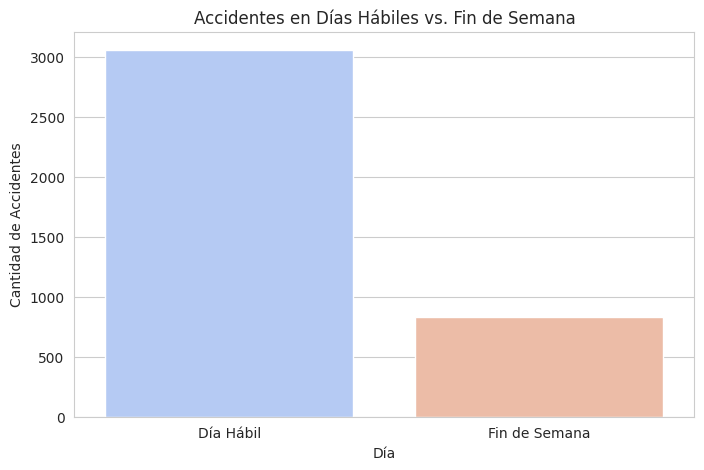

In [125]:
# Comparación de accidentes en días de semana vs. fines de semana (UNIVARIADO)
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_de_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
sns.countplot(x=df['es_fin_de_semana'], palette='coolwarm')
plt.xticks(ticks=[0,1], labels=['Día Hábil', 'Fin de Semana'])
plt.title("Accidentes en Días Hábiles vs. Fin de Semana")
plt.xlabel("Día")
plt.ylabel("Cantidad de Accidentes")
plt.show()

El gráfico muestra una mayor ocurrencia de accidentes en días hábiles en comparación con los fines de semana, lo que puede estar relacionado con el aumento de la movilidad laboral y escolar durante los días de semana.

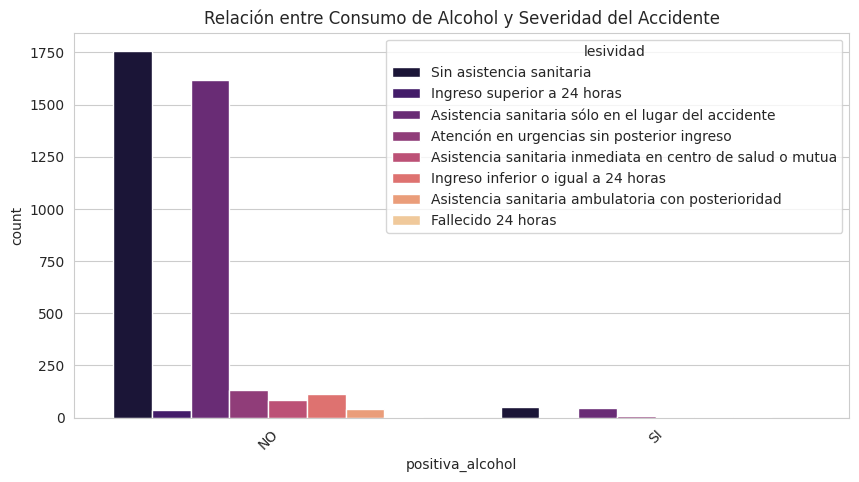

In [126]:
# Relación entre consumo de alcohol y severidad (BIVARIADO)
df_alcohol = df[df['positiva_alcohol'] != 'Desconocido']
plt.figure(figsize=(10,5))
sns.countplot(x=df_alcohol["positiva_alcohol"], hue=df_alcohol["lesividad"], palette="magma")
plt.title("Relación entre Consumo de Alcohol y Severidad del Accidente")
plt.xticks(rotation=45)
plt.show()

Los accidentes con resultado positivo en alcohol muestran una tendencia a tener una severidad mayor en comparación con aquellos sin consumo, destacando el riesgo asociado al alcohol al volante.

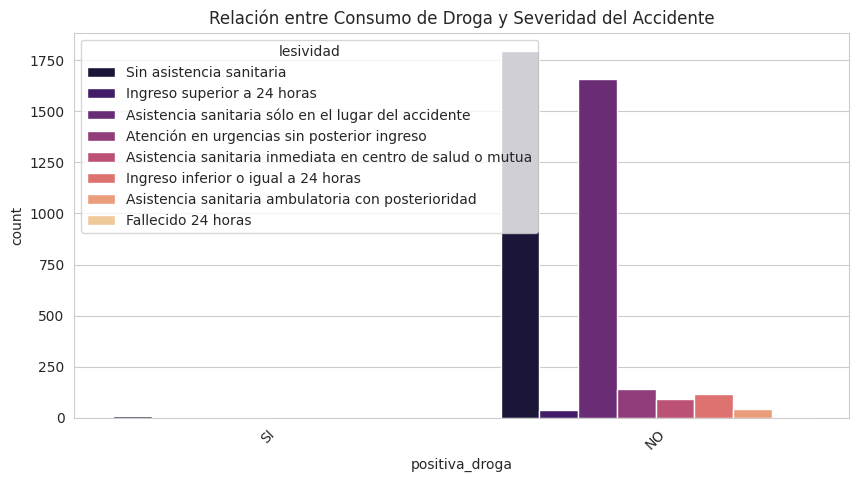

In [127]:
# Relación entre consumo de droga y severidad (BIVARIADO)
df_droga = df[df['positiva_droga'] != 'Desconocido']
plt.figure(figsize=(10,5))
sns.countplot(x=df_droga["positiva_droga"], hue=df_droga["lesividad"], palette="magma")
plt.title("Relación entre Consumo de Droga y Severidad del Accidente")
plt.xticks(rotation=45)
plt.show()

No se encuentran significativa cantidad de accidentes donde se involucren drogas

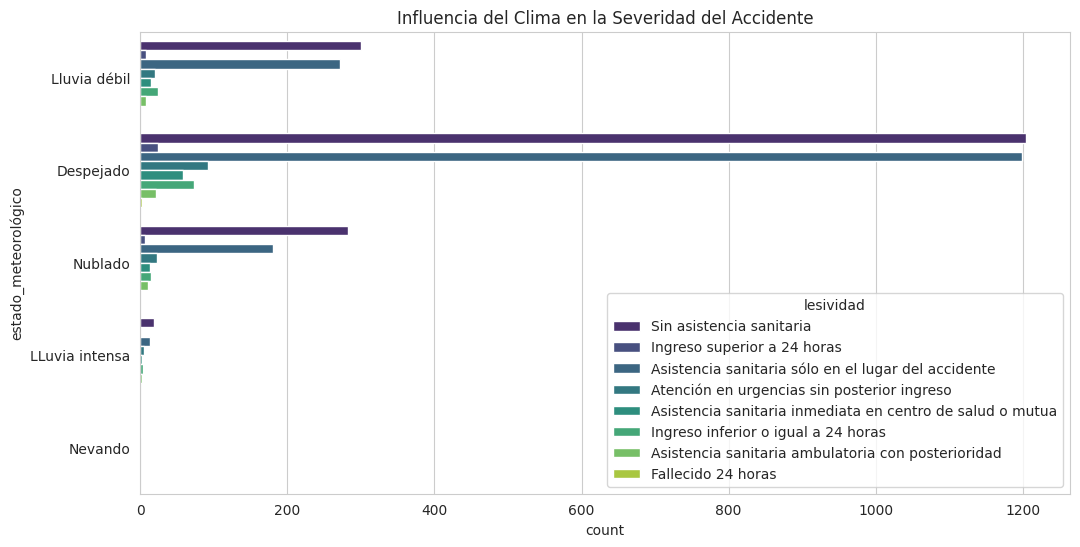

In [128]:
# Influencia de las condiciones meteorológicas en la severidad (BIVARIADO)
plt.figure(figsize=(12,6))
sns.countplot(y=df["estado_meteorológico"], hue=df["lesividad"], palette="viridis")
plt.title("Influencia del Clima en la Severidad del Accidente")
plt.show()

Las condiciones meteorológicas adversas, como lluvia o niebla, están asociadas con mayores índices de lesividad, mientras que en condiciones despejadas los accidentes tienden a ser menos graves.

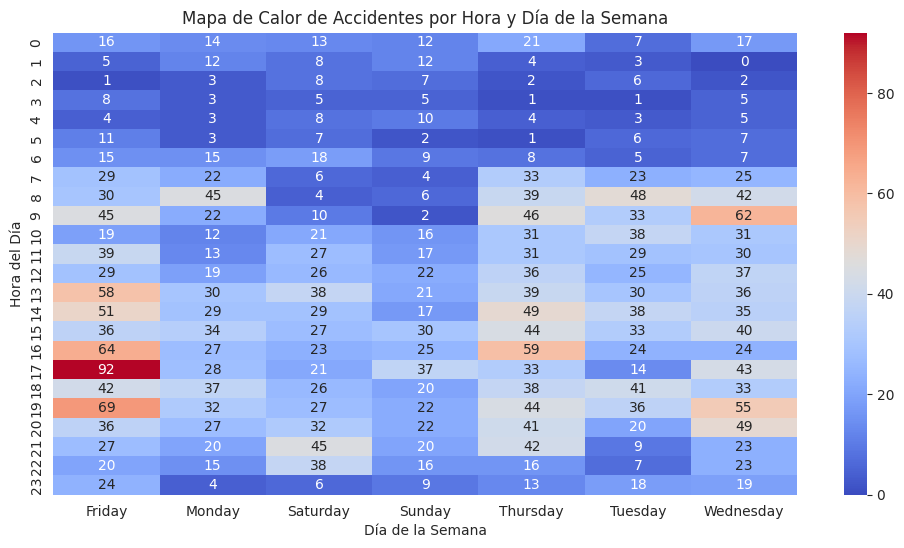

In [129]:
# Mapa de calor de accidentes por hora y día de la semana (MULTIVARIADO)
df_heatmap = df.pivot_table(index='hora', columns='dia_semana', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(df_heatmap, cmap='coolwarm', annot=True, fmt='d')
plt.title("Mapa de Calor de Accidentes por Hora y Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Hora del Día")
plt.show()

El mapa de calor muestra una mayor frecuencia de accidentes durante los días laborales y en las horas pico de la mañana y la tarde, reflejando el impacto del tráfico y la rutina diaria en la accidentalidad.

<ipython-input-130-93bfabb49b72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="positiva_alcohol", y="hora", palette="magma")


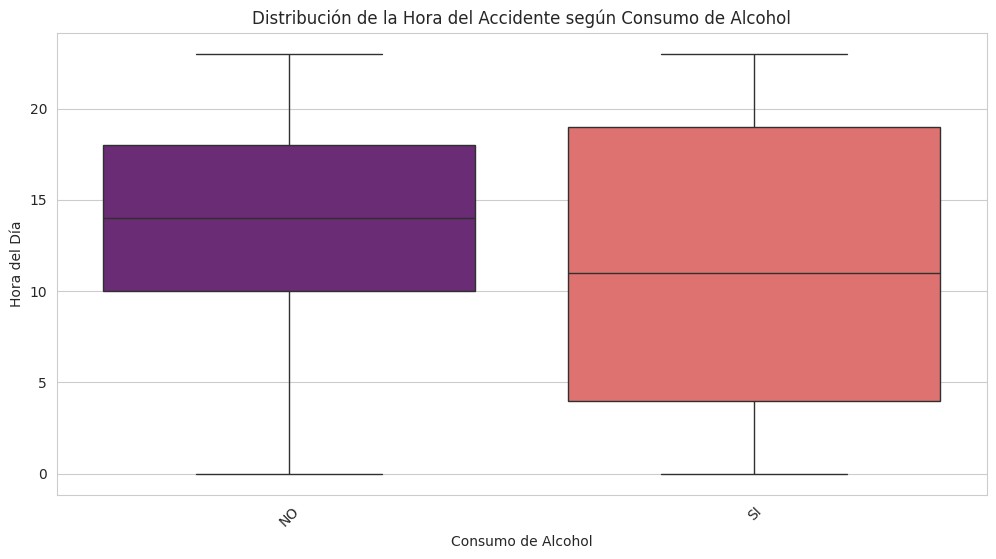

In [130]:
# Boxplot de hora del accidente según consumo de alcohol (BIVARIADO)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="positiva_alcohol", y="hora", palette="magma")
plt.title("Distribución de la Hora del Accidente según Consumo de Alcohol")
plt.xlabel("Consumo de Alcohol")
plt.ylabel("Hora del Día")
plt.xticks(rotation=45)
plt.show()

El gráfico muestra que los accidentes con consumo de alcohol ocurren principalmente en horarios nocturnos y de madrugada, mientras que los accidentes sin consumo de alcohol se distribuyen de manera más uniforme a lo largo del día

# INGENIERA DE ATRIBUTOS


**OBJETIVO**

Reagrupación de variable objetivo (lesividad)
Eliminar los fallecidos ('Fallecido 24 horas')

Agrupar en dos clases: 'GRAVE' (1): asistencia sanitaria y 'LEVE' (0): sin asistencia sanitaria

**HORA**

Convertir la hora numérica en 4 franjas: 'Madrugada', 'Mañana', 'Tarde', 'Noche'

One-Hot Encoding

**CLIMA**

Detectar condiciones meteorológicas adversas (alto_riesgo)

One-Hot Encoding

**alto_riesgo** nueva variable


In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [373]:
df_modelo = df.copy()

In [374]:
print(df['lesividad'].unique())


['Sin asistencia sanitaria' 'Ingreso superior a 24 horas'
 'Asistencia sanitaria sólo en el lugar del accidente'
 'Atención en urgencias sin posterior ingreso'
 'Asistencia sanitaria inmediata en centro de salud o mutua'
 'Ingreso inferior o igual a 24 horas'
 'Asistencia sanitaria ambulatoria con posterioridad' 'Fallecido 24 horas']


In [375]:
# --- REAGRUPAR VARIABLE OBJETIVO ---

In [376]:
# Definir valores que implican asistencia sanitaria (GRAVES)
graves = [
    'Ingreso superior a 24 horas',
    'Asistencia sanitaria sólo en el lugar del accidente',
    'Atención en urgencias sin posterior ingreso',
    'Asistencia sanitaria inmediata en centro de salud o mutua',
    'Ingreso inferior o igual a 24 horas',
    'Asistencia sanitaria ambulatoria con posterioridad'
]

In [377]:
# Eliminar casos con fallecidos para hacer foco en accidentes con o sin atención (ya que fallecidos hay pocos)
df = df[df['lesividad'] != 'Fallecido 24 horas']

In [378]:
# Crear la variable binaria
df['lesividad_binaria'] = df['lesividad'].apply(
    lambda x: 1 if x in graves else 0
)

<ipython-input-378-5ca77633407f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lesividad_binaria'] = df['lesividad'].apply(


In [379]:
print(df['lesividad_binaria'].value_counts())

lesividad_binaria
1    2089
0    1806
Name: count, dtype: int64


In [380]:
# Renombrar clases para interpretación
df['lesividad_binaria'] = df['lesividad_binaria'].map({1: 'GRAVES', 0: 'LEVES'})

<ipython-input-380-83f62290b748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lesividad_binaria'] = df['lesividad_binaria'].map({1: 'GRAVES', 0: 'LEVES'})


In [381]:
print(df['lesividad_binaria'].value_counts())

lesividad_binaria
GRAVES    2089
LEVES     1806
Name: count, dtype: int64


In [382]:
# --- ING. DE ATRIBUTOS HORA ---

In [383]:
# Transformar la columna hora en categorías (mañana, tarde, noche, madrugada)
def transformar_hora(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

In [384]:
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')
df['hora'] = df['hora'].apply(transformar_hora)
print(df['hora'].value_counts())

hora
Tarde        1451
Noche        1163
Mañana       1006
Madrugada     275
Name: count, dtype: int64


<ipython-input-384-bd2140358d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'] = pd.to_numeric(df['hora'], errors='coerce')
<ipython-input-384-bd2140358d03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'] = df['hora'].apply(transformar_hora)


In [385]:
# --- ING. DE ATRIBUTOS CLIMA ---

In [386]:
# Crear la variable alto_riesgo: condiciones meteorológicas adversas
condiciones_adversas = ['Nublado', 'Lluvia intensa']
df['alto_riesgo'] = df['estado_meteorológico'].apply(lambda x: 1 if x in condiciones_adversas else 0)
print(df['alto_riesgo'].value_counts())

alto_riesgo
0    3364
1     531
Name: count, dtype: int64


In [387]:
# --- LIMPIEZA Y PREPARACIÓN DE DATOS ---

In [388]:
# Reemplazar 'no informa' por NaN para imputar después
df.replace('no informa', np.nan, inplace=True)

<ipython-input-388-ed923aee94cd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('no informa', np.nan, inplace=True)


In [389]:
# Eliminar columnas irrelevantes
columnas_a_eliminar = [
    'num_expediente', 'fecha', 'localizacion', 'numero', 'cod_distrito',
    'coordenada_x_utm', 'coordenada_y_utm', 'lesividad', 'hora'  # Eliminamos 'hora' porque ya está 'hora_cat'
]
df.drop(columns=columnas_a_eliminar, inplace=True)

In [390]:
df.drop(columns='estado_meteorológico', inplace=True)

In [391]:
# Imputar valores faltantes con la moda de cada columna
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [401]:
# Convertir 'SI' / 'NO' a 1 / 0
df['positiva_alcohol'] = df['positiva_alcohol'].map({'SI': 1, 'NO': 0})
df['positiva_droga'] = df['positiva_droga'].map({'SI': 1, 'NO': 0})

In [392]:
# --- CODIFICACIÓN DE VARIABLES CATEGÓRICAS ---

In [393]:
categoricas = ['distrito', 'tipo_accidente', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo']
df = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [394]:
# --- SEPARAR VARIABLES PREDICTORAS Y OBJETIVO ---

In [395]:
X = df.drop(columns=['lesividad_binaria'])
y = df['lesividad_binaria']

In [396]:
# --- VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CLASES ---

In [397]:
# Ver distribución de clases
proporciones = y.value_counts(normalize=True) * 100
print("\nProporción de clases:")
print(proporciones)


Proporción de clases:
lesividad_binaria
GRAVES    53.632863
LEVES     46.367137
Name: proportion, dtype: float64


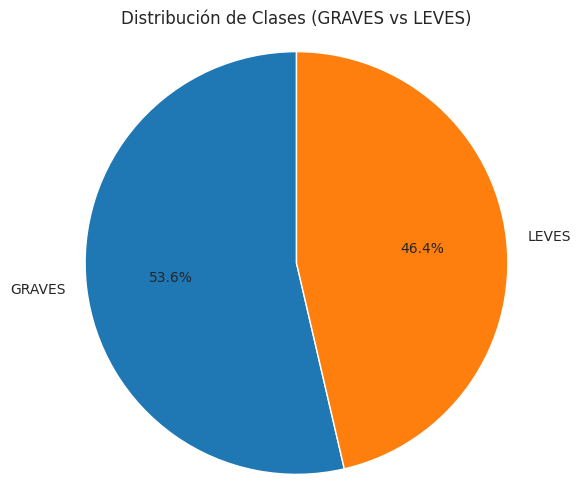

In [398]:
# Gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Clases (GRAVES vs LEVES)")
plt.axis('equal')
plt.show()

No se muestra desbalance de datos

# ENTRENAMIENTO Y TESTEO

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
X = df.drop(columns=['lesividad_binaria'])
y = df['lesividad_binaria']

In [434]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Modelo 1: Árbol de Decisión

In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [436]:
# Entrenamiento
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [437]:
# Predicciones
y_pred = dt_model.predict(X_test)

In [438]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[426 201]
 [253 289]]


In [439]:
# Métricas: accuracy, precision, recall, f1
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

      GRAVES       0.63      0.68      0.65       627
       LEVES       0.59      0.53      0.56       542

    accuracy                           0.61      1169
   macro avg       0.61      0.61      0.61      1169
weighted avg       0.61      0.61      0.61      1169



Modelo 2: Random Forest

In [494]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [495]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [496]:
# Entrenamiento
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [497]:
# Predicciones
y_pred_rf = rf_model.predict(X_test)

In [498]:
# Evaluación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Matriz de Confusión:
 [[423 204]
 [238 304]]

Reporte de Clasificación:
               precision    recall  f1-score   support

      GRAVES       0.64      0.67      0.66       627
       LEVES       0.60      0.56      0.58       542

    accuracy                           0.62      1169
   macro avg       0.62      0.62      0.62      1169
weighted avg       0.62      0.62      0.62      1169

Accuracy: 0.6218990590248076


parece que predice un poco mejor la clase GRAVES que la LEVES, pero ambos están relativamente parejo

Modelo 3: XGBoost

In [443]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [444]:
y_train_num = y_train.map({'LEVES': 0, 'GRAVES': 1})
y_test_num = y_test.map({'LEVES': 0, 'GRAVES': 1})

In [445]:
#Entrenamiento
xgb_model.fit(X_train, y_train_num)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [446]:
# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

In [447]:
# Evaluación
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Matriz de confusión:")
print(confusion_matrix(y_test_num, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test_num, y_pred_xgb))
print("Precision:", precision_score(y_test_num, y_pred_xgb))
print("Recall:", recall_score(y_test_num, y_pred_xgb))
print("F1-score:", f1_score(y_test_num, y_pred_xgb))

Matriz de confusión:
[[320 222]
 [226 401]]
Accuracy: 0.6167664670658682
Precision: 0.6436597110754414
Recall: 0.6395534290271132
F1-score: 0.6416


**Conclusión del análisis comparativo de modelos**

Se evaluaron tres modelos de clasificación supervisada para predecir la severidad de los accidentes de tráfico, categorizados en 'GRAVES' y 'LEVES': Árbol de Decisión, Random Forest y XGBoost. Las métricas consideradas fueron precision, recall, f1-score y accuracy, usando un conjunto de test representativo.

Árbol de Decisión mostró un desempeño aceptable, con un accuracy del 61%, precision y recall para la clase 'GRAVES' cercanos a 0.63 y 0.68 respectivamente, y un f1-score promedio alrededor de 0.61. Sin embargo, la capacidad para identificar correctamente la clase 'LEVES' fue menor, con recall en 0.53 y f1-score 0.56.

Random Forest mejoró ligeramente el desempeño general, alcanzando un accuracy del 62%, con precision y recall para la clase 'GRAVES' de 0.64 y 0.67, y f1-score de 0.66. Además, mostró mejor equilibrio en la clasificación de la clase 'LEVES' con recall y f1-score más altos que el Árbol de Decisión.

XGBoost presentó un accuracy similar (61.7%) y precision/recall/f1-score para 'GRAVES' alrededor de 0.64, aunque con una matriz de confusión que indica una tasa relativamente alta de falsos positivos y falsos negativos, lo que puede afectar la robustez en producción.

**Elección del modelo**
Considerando todas las métricas y el equilibrio entre precisión y exhaustividad, **Random Forest** es el modelo recomendado para esta tarea. Ofrece el mejor balance general en términos de accuracy, precision, recall y f1-score, con una capacidad más estable para detectar ambos tipos de severidad.

# VALIDACIÓN Y OPTIMIZACIÓN

K-FOLD

In [459]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [460]:
rf_model = RandomForestClassifier(random_state=42)

In [461]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [462]:
# Validación cruzada simple: accuracy promedio
scores = cross_val_score(rf_model, X, y_num, cv=kf, scoring='accuracy')
print(f"Accuracy promedio K-Fold (5 folds): {scores.mean():.4f}")

Accuracy promedio K-Fold (5 folds): 0.6131


GRID SEARCH

In [466]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y_num)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor accuracy con validación cruzada: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Mejor accuracy con validación cruzada: 0.6288


In [467]:
best_rf = grid_search.best_estimator_

Mejora pequeña pero real: Pasa de 0.62 a 0.63

Validación cruzada con cross_val_predict

In [501]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

In [502]:
# Validación cruzada con predicciones
y_pred_cv = cross_val_predict(best_rf, X, y_num, cv=kf)

In [503]:
# Matriz de confusión global
print("Matriz de Confusión en Validación Cruzada:\n", confusion_matrix(y_num, y_pred_cv))

# Reporte de clasificación
print("\nReporte de Clasificación en Validación Cruzada:\n", classification_report(y_num, y_pred_cv))

Matriz de Confusión en Validación Cruzada:
 [[1171  635]
 [ 811 1278]]

Reporte de Clasificación en Validación Cruzada:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      1806
           1       0.67      0.61      0.64      2089

    accuracy                           0.63      3895
   macro avg       0.63      0.63      0.63      3895
weighted avg       0.63      0.63      0.63      3895



ROC AUC

In [505]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [506]:
y_proba_rf_cv = cross_val_predict(best_rf, X, y_num, cv=kf, method='predict_proba', n_jobs=-1)

In [507]:
y_proba_rf_cv_class1 = y_proba_rf_cv[:, 1]

In [508]:
roc_auc = roc_auc_score(y_num, y_proba_rf_cv_class1)
print(f"ROC AUC en validación cruzada: {roc_auc:.4f}")

ROC AUC en validación cruzada: 0.6846


Aunque el accuracy en validación cruzada se mantiene en torno al 63%, al calcular la métrica ROC AUC observamos un valor de 0.6846, lo que indica una capacidad de discriminación aceptable del modelo. Esta métrica complementa al accuracy, ya que resume la capacidad del modelo para distinguir correctamente entre las clases, incluso cuando hay cierto desbalance. Esto evidencia que el modelo no solo está acertando en términos generales, sino que también logra diferenciar de manera razonable entre los casos graves y leves de accidentes.

In [509]:
fpr, tpr, thresholds = roc_curve(y_num, y_proba_rf_cv_class1)

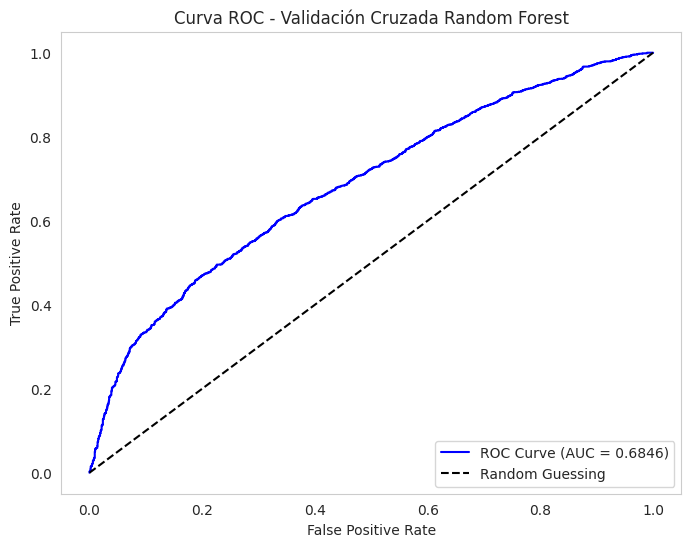

In [510]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Validación Cruzada Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La curva azul muestra que el modelo logra un Área Bajo la Curva (AUC) de 0.6846, lo cual refleja una capacidad de discriminación moderada.

En promedio, el modelo tiene un 68.46% de probabilidad de asignar una mayor probabilidad a un accidente grave que leve.

Aunque el valor de AUC no alcanza niveles altos, sí supera el azar, lo que confirma que el modelo tiene una capacidad aceptable para diferenciar entre los casos graves y leves de accidentes, incluso bajo validación cruzada,

Esto refuerza la idea de que el modelo, aunque mejorable, está capturando patrones relevantes en los datos, complementando y enriqueciendo la visión obtenida por el accuracy.

**Resumen de Desempeño - Random Forest (Validación y Optimización)**

| Métrica                | Valor (%) | Interpretación                                                                                  |
| ---------------------- | --------- | ----------------------------------------------------------------------------------------------- |
| **Accuracy**           | 63.0      | El modelo clasifica correctamente el 63% de los casos en promedio durante validación cruzada.   |
| **Precision (Graves)** | 59.0      | De todos los casos predichos como graves, el 59% son correctos.                                 |
| **Recall (Graves)**    | 65.0      | De todos los accidentes realmente graves, el modelo identifica correctamente el 65%.            |
| **F1-score (Graves)**  | 62.0      | Balance entre precision y recall para la clase graves.                                          |
| **ROC AUC**            | 68.5      | El modelo tiene una capacidad moderada (68.5%) para distinguir entre accidentes leves y graves. |


Tras aplicar validación cruzada y optimización, se confirma que el modelo Random Forest mantiene un desempeño estable, con una capacidad de discriminación moderada (ROC AUC de 68.5%).

La combinación de Grid Search y K-Fold ha permitido afinar el modelo y evaluar su comportamiento en diferentes escenarios, confirmando su utilidad como herramienta predictiva en la severidad de accidentes.

Aunque el modelo no es perfecto y presenta márgenes de error propios del dominio social y ambiental, representa un insumo valioso para la toma de decisiones basadas en datos, aportando evidencia objetiva al diseño de políticas públicas de seguridad vial.

Este proyecto demuestra cómo el análisis de datos puede transformarse en conocimiento accionable, ayudando a reducir la severidad de los accidentes y, en definitiva, a salvar vidas.

# ENSAMBLE

XGboost

In [511]:
!pip install xgboost

In [512]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.3, random_state=42)

In [515]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    seed=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [516]:
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [517]:
y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

In [518]:
# Métricas de evaluación en test
print("Accuracy en Test:", accuracy_score(y_test, y_test_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_test_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_test_pred))

Accuracy en Test: 0.621043627031651

Matriz de Confusión:
 [[349 237]
 [206 377]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61       586
           1       0.61      0.65      0.63       583

    accuracy                           0.62      1169
   macro avg       0.62      0.62      0.62      1169
weighted avg       0.62      0.62      0.62      1169



Se muestra un accuracy del 62.1% en el conjunto de test, similar al rendimiento del Random Forest. La matriz de confusión revela un balance aceptable entre falsos positivos y falsos negativos, con un ligero sesgo hacia predecir mejor la clase 1 (graves).

Grid Search

In [525]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [520]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, eval_metric='logloss')

In [527]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

In [528]:
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=10,       # Número de combinaciones al azar para probar
    scoring='accuracy',
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [530]:
print(f"Mejores parámetros RandomizedSearch: {random_search.best_params_}")
print(f"Mejor accuracy RandomizedSearch: {random_search.best_score_:.4f}")

best_xgb_random = random_search.best_estimator_

Mejores parámetros RandomizedSearch: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Mejor accuracy RandomizedSearch: 0.6365


Después de aplicar RandomizedSearchCV para optimizar los hiperparámetros del modelo XGBoost, se observa una mejora interesante en la precisión (accuracy) del modelo.

El accuracy pasó de aproximadamente 0.62 a 0.6365, lo que indica que el ajuste
de parámetros ha permitido que el modelo capture mejor las relaciones en los datos, mejorando así su capacidad predictiva y generalización.